# Classificação de Exoplanetas


## 1 Setup

### 1.1 Carregando o dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from csv import reader
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("koi_data.csv") 

In [3]:
data.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


### 1.2 Tratando os dados

Considerando a variedade na magnitude dos campos e a presença de campos textuais, iremos tratar os dados antes de prosseguir para os métodos de classificação.

- Lidando com campos não númericos

In [4]:
data = data.replace("CONFIRMED", "1", regex=True)
data = data.replace("FALSE POSITIVE", "0", regex=True)
data.drop('kepoi_name', axis=1, inplace=True)

In [5]:
data.head()

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,0,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,0,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


- Normalizando os dados

In [6]:
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data.values)

scaled_data = pd.DataFrame(scaled_data)

In [7]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,1.0,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.0,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,1.0,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.0,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866


- Separando `Features` de `Target Output`

In [8]:
features = scaled_data.iloc[:, 1:]

In [9]:
features.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866


In [10]:
output = scaled_data.iloc[:, 0]

In [11]:
output.head().values

array([1., 1., 0., 1., 0.])

In [12]:
output.values

array([1., 1., 0., ..., 0., 0., 0.])

### 1.3 Estabelecendo conjuntos treino e teste

- Dividimos "feature" e "output" em treino (80%) e teste (20%), de forma aleatória usando `train_test_split`

In [13]:
X = features.values
y = output.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
output.values

array([1., 1., 0., ..., 0., 0., 0.])

In [15]:
print(len(X_train))
print(len(X_test))

4161
1041


## 2 Algoritmos

Os métodos serão avaliados usando validação cruzada 5-fold (accuracy score), seguida da acurácia na previsão para o conjunto de teste.
<p>Para fazer tuning de parâmetros, utilizaremos o gridSearch, que verifica os resultados da validação cruzada para uma lista de parâmetros fornecida. Dessa forma será mais fácil recuperar a melhor configuração no nosso tuning.<p/>


### 2.1 Naive Bayes

Experimento baseline.

- Aplicando 5-fold CV no treino

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()

In [ ]:
cv_scores = cross_val_score(clf_NB, X_train, y_train, cv=5)

In [ ]:
print("5-fold CV mean score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

- Previsão sobre o conjunto de teste

In [ ]:
clf_NB = clf_NB.fit(X_train,y_train)
y_pred_NB = clf_NB.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))

- Obtivemos um resultado no teste levemente mais baixo que na validação. O método ainda generaliza bem.

### 2.2 Decision Tree

Tuning do parâmetro `max_depth` (altura máxima da árvore)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_DT = DecisionTreeClassifier()

In [ ]:
k_range = list(range(1, 31))

In [ ]:
param_grid = dict(max_depth=k_range)

In [ ]:
grid = GridSearchCV(clf_DT, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

In [ ]:
dtf = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of depth for Decision Tree')
plt.ylabel('5-Fold Cross-Validated Accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

- Verificando 5-fold CV para comprimento ilimitado

In [ ]:
clf_DT = DecisionTreeClassifier(max_depth=None)
cv_scores = cross_val_score(clf_DT, X_train, y_train, cv=5)
print("5-fold CV mean score: %0.6f " % (cv_scores.mean()))

- Escolheremos a configuração com melhor resultado na validação cruzada para fazer o teste

In [ ]:
if(cv_scores.mean() < grid.best_score_):
    clf_DT = DecisionTreeClassifier(max_depth=None)
    
clf_DT = clf_DT.fit(X_train,y_train)
y_pred_DT = clf_DT.predict(X_test)

- Plot da árvore produzida

In [ ]:
from sklearn import tree
tree.plot_tree(clf_DT)
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

- O valor de accuracy ficou bastante satisfatório e próximo do valor da validação. O classificador foi capaz de generalizar bem.

### 2.3 SVM

In [17]:
from sklearn import svm

#### 2.3.1 Linear

Experimento simples com kernel Linear, não variando parâmetros.

In [18]:
clf_SVM_LIN = svm.SVC(kernel='linear', probability=True)

In [19]:
cv_scores = cross_val_score(clf_SVM_LIN, X, y, cv=5)

In [20]:
print("5-fold CV mean score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

5-fold CV mean score: 0.9106 (+/- 0.0519)


In [21]:
clf_SVM_LIN.fit(X_train,y_train)
y_pred_SVM_LIN = clf_SVM_LIN.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM_LIN))

Accuracy: 0.9087415946205571


- O valor de accuracy ficou bastante satisfatório e próximo do valor da validação. O classificador foi capaz de generalizar bem.

#### 2.3.2 Sigmoid

Para kernel sigmoid, usaremos o parâmetro `gamma` (para hiperplanos, definindo a exatidão na aproximação)

In [ ]:
clf_SVM_SIG = svm.SVC(kernel='sigmoid', gamma=0.1, probability=True)

In [ ]:
clf_SVM_SIG.fit(X_train,y_train)

In [ ]:
cv_scores = cross_val_score(clf_SVM_SIG, X, y, cv=5)

In [ ]:
print("5-fold CV mean score: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

In [ ]:
y_pred_SVM_SIG = clf_SVM_SIG.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM_SIG))

- O valor de accuracy ficou _baixo_ em relação aos demais métodos, mas ficou próximo da validação. Não há indícios de over-fitting.

#### 2.3.3 Polinomial

Para o kernel polinomial, faremos o tuning do parâmetro `degree` (grau do polinômio)

In [23]:
clf_SVM_POL = svm.SVC()

In [24]:
d_range = list(range(2, 17))

In [25]:
param_grid = dict(degree=d_range, kernel=['poly'])

In [26]:
grid = GridSearchCV(clf_SVM_POL, param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                    15, 16],
                         'kernel': ['poly']},
             scoring='accuracy')

- Resultados do GridSearch

Text(0, 0.5, '5-Fold Cross-Validated Accuracy')

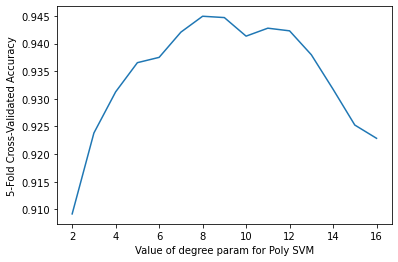

In [27]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(d_range, grid_mean_scores)
plt.xlabel('Value of degree param for Poly SVM')
plt.ylabel('5-Fold Cross-Validated Accuracy')

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.9449660633484163
{'degree': 8, 'kernel': 'poly'}


- Usaremos o melhor parâmetro encontrado para previsão sobre o conjunto de teste

In [29]:
clf_SVM_POL = svm.SVC(kernel='poly', degree =grid.best_params_['degree'], probability=True)
clf_SVM_POL.fit(X_train,y_train)
y_pred_SVM_POL = clf_SVM_POL.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM_POL))

Accuracy: 0.94716618635927


- O valor de accuracy ficou bastante satisfatório e próximo do valor da validação. O classificador foi capaz de generalizar bem.

#### 2.3.4 RBF

Para o kernel RBF, faremos o tuning do parâmetro `C` (penalidade do erro)

In [ ]:
clf_SVM_RBF = svm.SVC()

In [ ]:
c_range = list(range(0, 5))

In [ ]:
# param_grid = dict(degree=c_range, kernel=['rbf'])
param_grid = {'C': [1, 10, 100, 1000, 10000]}

In [ ]:
grid = GridSearchCV(clf_SVM_RBF, param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

- Resultados do GridSearch

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(c_range, grid_mean_scores)
plt.xlabel('Value of x for C = 10^x for RBF SVM')
plt.ylabel('5-Fold Cross-Validated Accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

- Usaremos o melhor parâmetro encontrado para previsão sobre o conjunto de teste

In [ ]:
clf_SVM_RBF = svm.SVC(kernel='rbf', C=grid.best_params_['C'], probability=True)
clf_SVM_RBF.fit(X_train,y_train)
y_pred_SVM_RBF = clf_SVM_RBF.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM_RBF))

- O valor de accuracy ficou bastante satisfatório e próximo do valor da validação. O classificador foi capaz de generalizar bem.

### 2.4 K-NN

- Para o _K-Nearest Neighbors_, vamos verificar os resultados da validação cruzada 5-fold com variação no parâmetro `n_neighbors` para valores de 2 até 32.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_KNN = KNeighborsClassifier()

In [ ]:
k_range = list(range(2, 33))
# print(k_range)

In [ ]:
param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [ ]:
grid = GridSearchCV(clf_KNN, param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

- Resultados do GridSearch

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('5-Fold Cross-Validated Accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

- Pelo melhor score (accuracy) obtido na validação cruzada, podemos concluir a aproximação obtida no KNN não teve uma capacidade de generalização tão boa quanto a do Naive Bayes, mesmo com a melhor configuração encontrada.
- Um ponto interessante foi observar o comportamento do KNN pelo gráfico, podendo ver explicitamente o contraste entre valores pares e impares para K.

- Usaremos o melhor parâmetro encontrado para previsão sobre o conjunto de teste

In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_KNN.fit(X_train,y_train)
y_pred_KNN = clf_KNN.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_KNN))

- Após prever no conjunto de teste, observamos uma acurácia das previsões menor que na validação cruzada, podendo ser um indício de um leve over-fitting.
- Comparando com o Naive Bayes, vimos uma menor capacidade de generalização por parte do KNN.

### 2.5 Random Forest

- Para o _Random Forest_, vamos verificar os resultados da validação cruzada 5-fold com variação no parâmetro `n_estimators` (Número de árvores na _floresta_) para valores de 2 até 64.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_RDF = RandomForestClassifier()

In [ ]:
r_range = list(range(2, 65))
# print(r_range)

In [ ]:
param_grid = dict(n_estimators=r_range)
# print(param_grid)

In [ ]:
grid = GridSearchCV(clf_RDF, param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(X, y)

- Resultados do GridSearch

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(r_range, grid_mean_scores)
plt.xlabel('Value of N for Random Forest estimators')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

- Pelo melhor score (accuracy) obtido na validação cruzada, podemos concluir que obtivemos uma boa aproximação, não foram sentidos impactos de overfitting.

- Usaremos o melhor parâmetro encontrado para previsão sobre o conjunto de teste

In [ ]:
clf_RDF = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
clf_RDF.fit(X_train, y_train)
y_pred_RDF = clf_RDF.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RDF))

- Após prever no conjunto de teste, observamos uma acurácia das previsões muito próxima da validação. O método generalizou muito bem.
- Comparando com o Naive Bayes, vimos uma maior capacidade de generalização por parte do Random Forest.

### 2.6 Gradient Tree Boosting

- Para o _Gradient Tree Boosting_, vamos verificar os resultados da validação cruzada 5-fold com variação no parâmetro `n_estimators`, referente ao número de iterações, para valores de 256 até 512.
- Procurando sobre o método, encontrei que se comporta de forma robusta e responde bem ao aumento do parâmetro em questão. Contudo, a execução mostrou-se muito demorada.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf_GTB = GradientBoostingClassifier(learning_rate=1)

In [ ]:
g_range = list(range(256, 513))

In [ ]:
param_grid = dict(n_estimators=g_range)

- Executar a busca para obter o melhor valor para n_estimators no intervalo definido é muito custoso. Portanto, na intenção de evitar uma espera de 3 horas, informo que melhor obtido foi 372 e a parte abaixo pode ser pulada.
- Deixarei o código da seção comentado e manterei o gráfico que obtive.

In [ ]:
# grid = GridSearchCV(clf_GTB, param_grid, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)
# grid.fit(X, y)

- Resultados do GridSearch

In [ ]:
# grid_mean_scores = grid.cv_results_['mean_test_score']
# plt.plot(g_range, grid_mean_scores)
# plt.xlabel('Value of N for Gradient Tree Boosting estimators')
# plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# print(grid.best_score_)
# print(grid.best_params_)

- Pelo melhor score (accuracy) obtido na validação cruzada, podemos concluir que obtivemos uma boa aproximação, não foram sentidos impactos de overfitting.

- Usaremos o melhor parâmetro encontrado (372) para previsão sobre o conjunto de teste.

In [ ]:
# clf_GTB = GradientBoostingClassifier(learning_rate=1, n_estimators=grid.best_params_['n_estimators'])
clf_GTB = GradientBoostingClassifier(learning_rate=1, n_estimators=372)

In [ ]:
clf_GTB.fit(X_train, y_train)
y_pred_GTB = clf_GTB.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GTB))

- Após prever no conjunto de teste, obtivemos uma acurácia bastante interessante, muito próxima à observada na validação cruzada, o que é um fato bem positivo. 
- O GTB trouxe resultados muito bons, em relação aos demais métodos. O downside foi de fato a parte de tuning do número de iterações, que mostrou-se bem custosa em tempo.

## 3 Comparação de resultados

- Compararemos abaixo os métodos de classificação estudados anteriormente, utilizando as métricas de precisão e recall, além da curva ROC.

In [ ]:
models = [
{
    'label': 'Gaussian Naive Bayes',
    'model': clf_NB,
    'precision': metrics.precision_score(y_test, y_pred_NB),
    'recall': metrics.recall_score(y_test, y_pred_NB)
},
{
    'label': 'Decision Tree',
    'model': clf_DT,
    'precision': metrics.precision_score(y_test, y_pred_DT),
    'recall': metrics.recall_score(y_test, y_pred_DT)
},
{
    'label': 'SVM Linear',
    'model': clf_SVM_LIN,
    'precision': metrics.precision_score(y_test, y_pred_SVM_LIN),
    'recall': metrics.recall_score(y_test, y_pred_SVM_LIN)
},
{
    'label': 'SVM Sigmoid',
    'model': clf_SVM_SIG,
    'precision': metrics.precision_score(y_test, y_pred_SVM_SIG),
    'recall': metrics.recall_score(y_test, y_pred_SVM_SIG)
},
{
    'label': 'SVM Poly',
    'model': clf_SVM_POL,
    'precision': metrics.precision_score(y_test, y_pred_SVM_POL),
    'recall': metrics.recall_score(y_test, y_pred_SVM_POL)
},    
{
    'label': 'SVM RBF',
    'model': clf_SVM_RBF,
    'precision': metrics.precision_score(y_test, y_pred_SVM_RBF),
    'recall': metrics.recall_score(y_test, y_pred_SVM_RBF)
},
{
    'label': 'K Nearest Neighbors',
    'model': clf_KNN,
    'precision': metrics.precision_score(y_test, y_pred_KNN),
    'recall': metrics.recall_score(y_test, y_pred_KNN)
},
{
    'label': 'Random Forest',
    'model': clf_RDF,
    'precision': metrics.precision_score(y_test, y_pred_RDF),
    'recall': metrics.recall_score(y_test, y_pred_RDF)
},
{
    'label': 'Gradient Boosting',
    'model': clf_GTB,
    'precision': metrics.precision_score(y_test, y_pred_GTB),
    'recall': metrics.recall_score(y_test, y_pred_GTB)
}
]

In [ ]:
models

### 3.1 Curva ROC

Calculando e apresentando as curvas ROC para cada método.

In [ ]:
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

### 3.2 Precision & Recall

Apresentando uma tabela com precision e recall para cada um dos métodos, por ordem descendente de precisão.

In [ ]:
df = pd.DataFrame(models)[['label', 'precision', 'recall']]
df.sort_values(['precision'], ascending=[0])